<a href="https://colab.research.google.com/github/Chiporito93/MLtareas/blob/main/Laboratorio_Red_Neuronal_con_MNIST_DASF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

Cargar el conjunto de datos MNIST

In [4]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.LWRM7X_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.LWRM7X_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [6]:
datos_entrenamiento=datos["train"]
datos_prueba=datos["test"]

In [7]:
nombre_clases=metadatos.features["label"].names

Preprocesamiento

In [8]:
#Normalizacion
#0-255 1 byte
#Transformar 0-255 -- 0-1 (0=0,255=1,127=0.5)
#Normalizar datos ent y pruebas

def normalizar(imagenes,etiquetas):
  imagenes=tf.cast(imagenes,tf.float32)
  imagenes= imagenes/255
  return imagenes,etiquetas

datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_pruebas=datos_prueba.map(normalizar)

#Agregaar en cache
datos_entrenamiento=datos_entrenamiento.cache()
datos_prueba=datos_prueba.cache()


Visualizar ejemplos del dataset

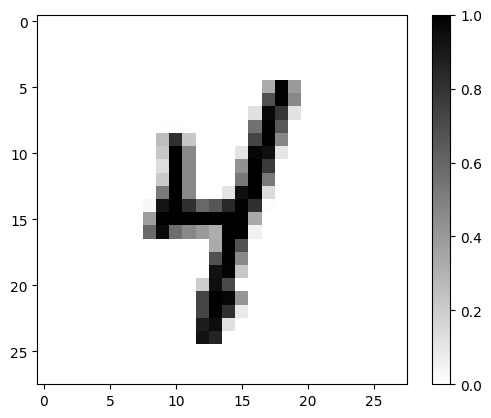

In [9]:
for imagen,etiquetas in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

# mostrarlo en pantalla

plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()


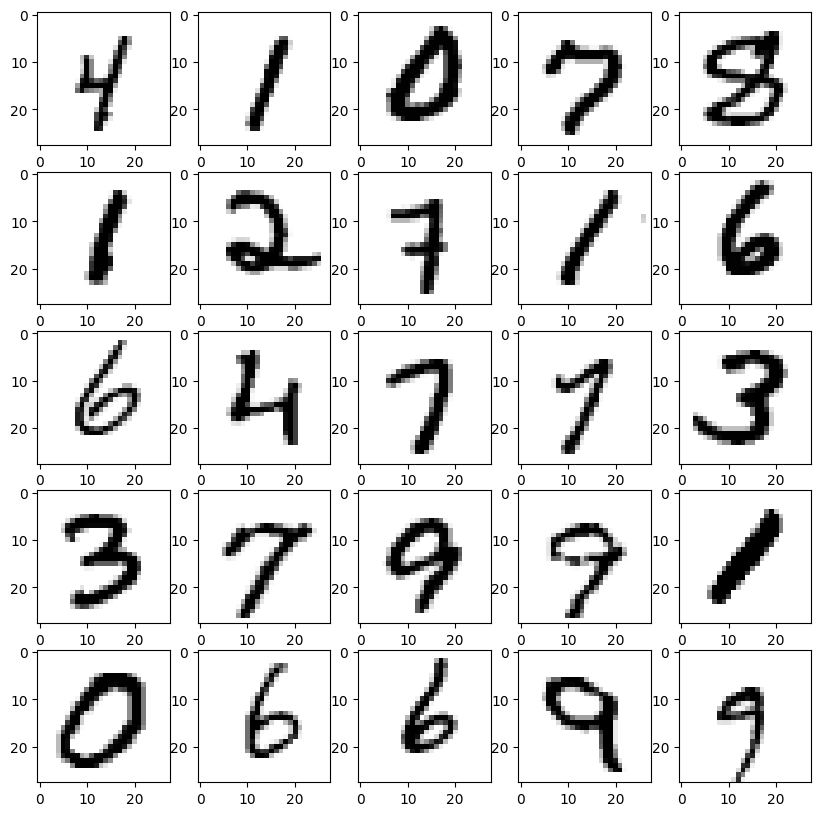

In [10]:

plt.figure(figsize=(10,10))
for i, (imagen,etiquetas) in enumerate(datos_entrenamiento.take(25)):


  # mostrarlo en pantalla

  plt.subplot(5,5,i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)



Preprocesamiento

Definir la red neuronal

In [11]:
#28x28 pixeles se puede poner 784 entradas
modelo= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 es porque es blanco y negro
    #### Capa oculta
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    tf.keras.layers.Dense(50,activation=tf.nn.relu),
    # Capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Definir la red neuronal

In [12]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]

)

Entrenar el modelo

In [13]:
tamano_lote=32
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(60000).batch(tamano_lote)
datos_prueba=datos_prueba.batch(tamano_lote)

Evaluar el modelo

In [14]:
import math

#Entrenar
entrenamiento = modelo.fit(
    datos_entrenamiento,epochs=10,
    steps_per_epoch=math.ceil(60000/tamano_lote)

)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8515 - loss: 0.5267
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9583 - loss: 0.1440
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9672 - loss: 0.1108
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0869
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9785 - loss: 0.0695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0655
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9847 - loss: 0.0468
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0485
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0438
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0347


¿Qué ventaja observas al usar codificación one-hot para las etiquetas?

La codificación one-hot permite representar las clases como vectores binarios, lo que es ideal para la función de activación softmax en la salida. Esto facilita que el modelo aprenda a asignar probabilidades correctas a cada clase. Aunque en mi caso no la usé directamente, se asume internamente en funciones como sparse_categorical_crossentropy.

¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas?

Al aumentar el número de neuronas ocultas, el modelo gana capacidad de representación y mejora la precisión, hasta cierto punto. Si se reducen demasiado, la red no logra capturar patrones complejos y disminuye la accuracy. Lo comprobé al bajar las neuronas ocultas y ver un desempeño más pobre.

¿Qué alternativa propondrías al optimizador adam y por qué?

Una alternativa común es SGD con momentum, que es más simple y puede ofrecer mejor generalización en algunos casos. También se podría usar RMSprop si se quiere mantener una adaptación del learning rate, o Adagrad para problemas con datos escasos. Adam es generalmente robusto, pero no siempre es el más generalizable.

¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo?

Entrenar más épocas puede mejorar el desempeño en entrenamiento, pero el riesgo es el sobreajuste (overfitting), donde el modelo se adapta demasiado al set de entrenamiento y pierde capacidad de generalizar al conjunto de prueba. Se incrementa el tiempo de entrenamiento sin necesariamente mejorar el desempeño en datos nuevos.

¿Por qué es importante dividir en conjuntos de entrenamiento y prueba?

Porque permite evaluar si el modelo generaliza bien. Si solo entrenamos y probamos en los mismos datos, no sabemos si realmente aprendió patrones útiles o si simplemente memorizó los ejemplos. El set de prueba es clave para validar el desempeño real del modelo.